In [1]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sn
import numpy as np
from models.scripts.utils import apply_moving_average_for_roc

In [2]:
df = pd.read_csv("data/sp500/csv/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date')

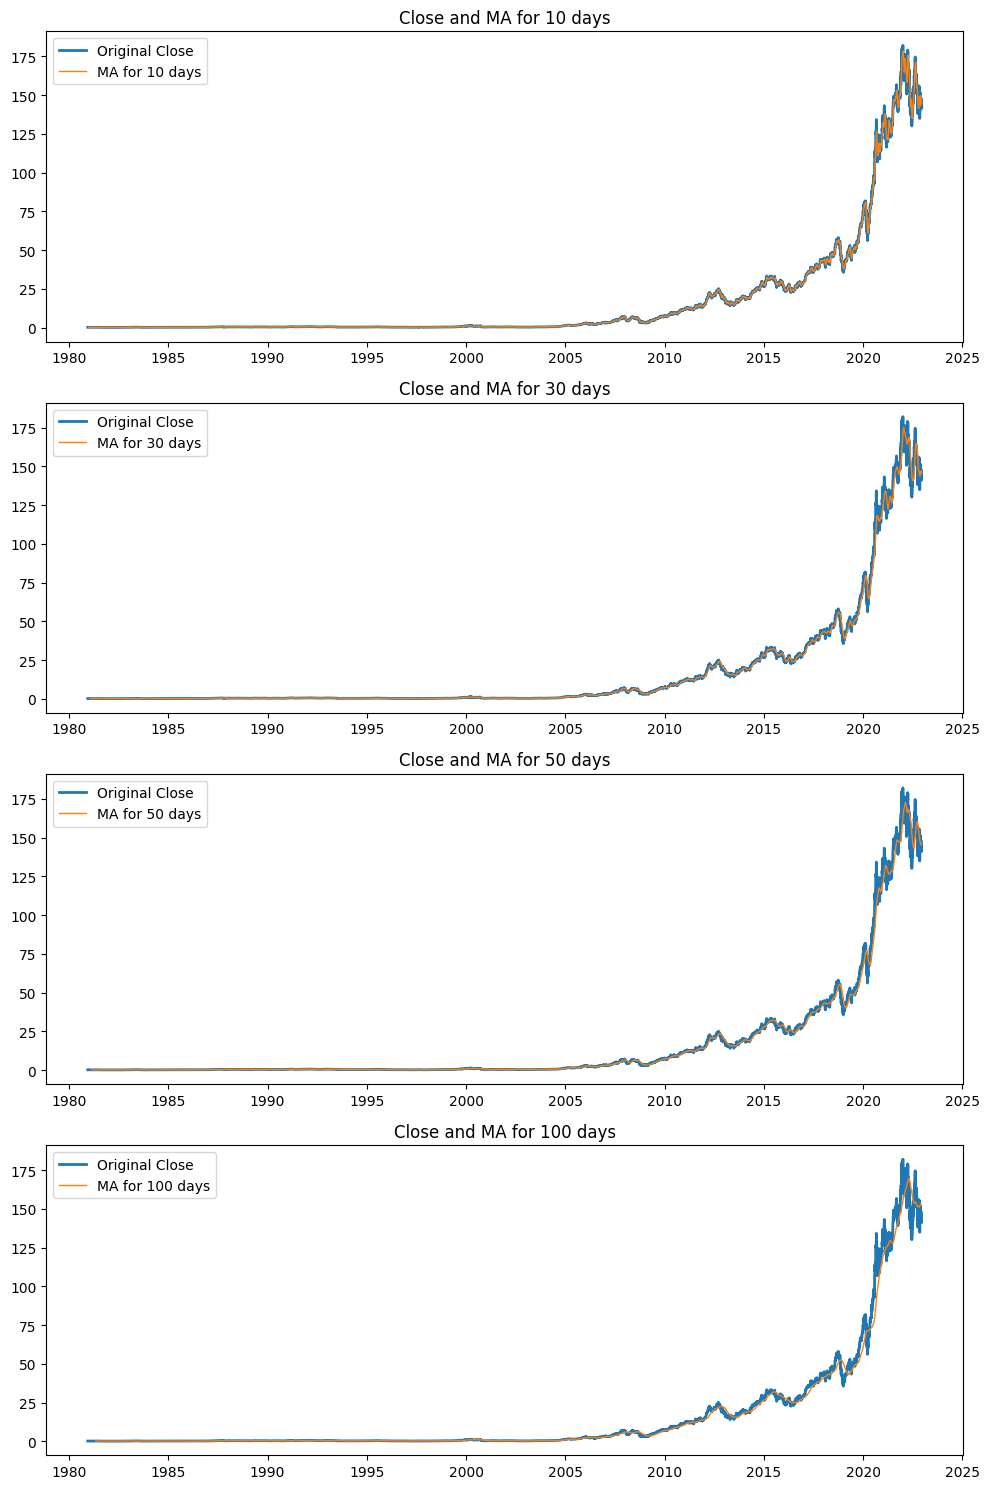

In [3]:
ma_day = [10, 30, 50, 100]
df_copy = df.copy()
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_copy[column_name] = df_copy['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=len(ma_day), ncols=1, figsize=(10, 15))

for i, ma in enumerate(ma_day):
    column_name = f"MA for {ma} days"
    axes[i].plot(df_copy['Date'],df_copy['Close'], label='Original Close', linewidth=2)
    axes[i].plot(df_copy['Date'],df_copy[column_name], label=f'{column_name}', linewidth=1)
    axes[i].set_title(f'Close and {column_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [4]:
df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
10585,2022-12-06,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
10586,2022-12-07,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
10587,2022-12-08,141.100006,142.360001,62128300,143.520004,142.649994,142.649994
10588,2022-12-09,140.899994,142.339996,76069500,145.570007,142.160004,142.160004
10589,2022-12-12,141.070007,142.699997,20280660,143.000000,142.240005,142.240005


In [5]:
train_size = int(len(df) * 0.9)
val_size = int(len(df) * 0.05)
train = df.iloc[:train_size, :]
val = df.iloc[train_size:train_size + val_size, :]
test = df.iloc[train_size + val_size:, :]

In [6]:
train.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
9526,2018-09-21,54.322498,55.195000,384986800,55.340000,54.415001,52.337421
9527,2018-09-24,54.157501,54.205002,110773600,55.314999,55.197498,53.090046
9528,2018-09-25,54.924999,54.937500,98217600,55.705002,55.547501,53.426685
9529,2018-09-26,54.939999,55.250000,95938800,55.937500,55.105000,53.001076
9530,2018-09-27,55.884998,55.955002,120724800,56.610001,56.237499,54.090340


In [7]:
train = apply_moving_average_for_roc(dataframe=train, ma_type='ma', roc_window=10)
test = apply_moving_average_for_roc(dataframe=test, ma_type='ma', roc_window=10)
val = apply_moving_average_for_roc(dataframe=val, ma_type='ma', roc_window=10)

In [11]:
train.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close,ROC_0,ROC_1,ROC_2
9526,2018-09-21,54.322498,55.195000,384986800,55.340000,54.415001,52.337421,1,0,1
9527,2018-09-24,54.157501,54.205002,110773600,55.314999,55.197498,53.090046,1,0,1
9528,2018-09-25,54.924999,54.937500,98217600,55.705002,55.547501,53.426685,1,0,1
9529,2018-09-26,54.939999,55.250000,95938800,55.937500,55.105000,53.001076,1,0,1
9530,2018-09-27,55.884998,55.955002,120724800,56.610001,56.237499,54.090340,1,0,1


### Exponential Moving Average

In [12]:
df = pd.read_csv("data/sp500/csv/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date')

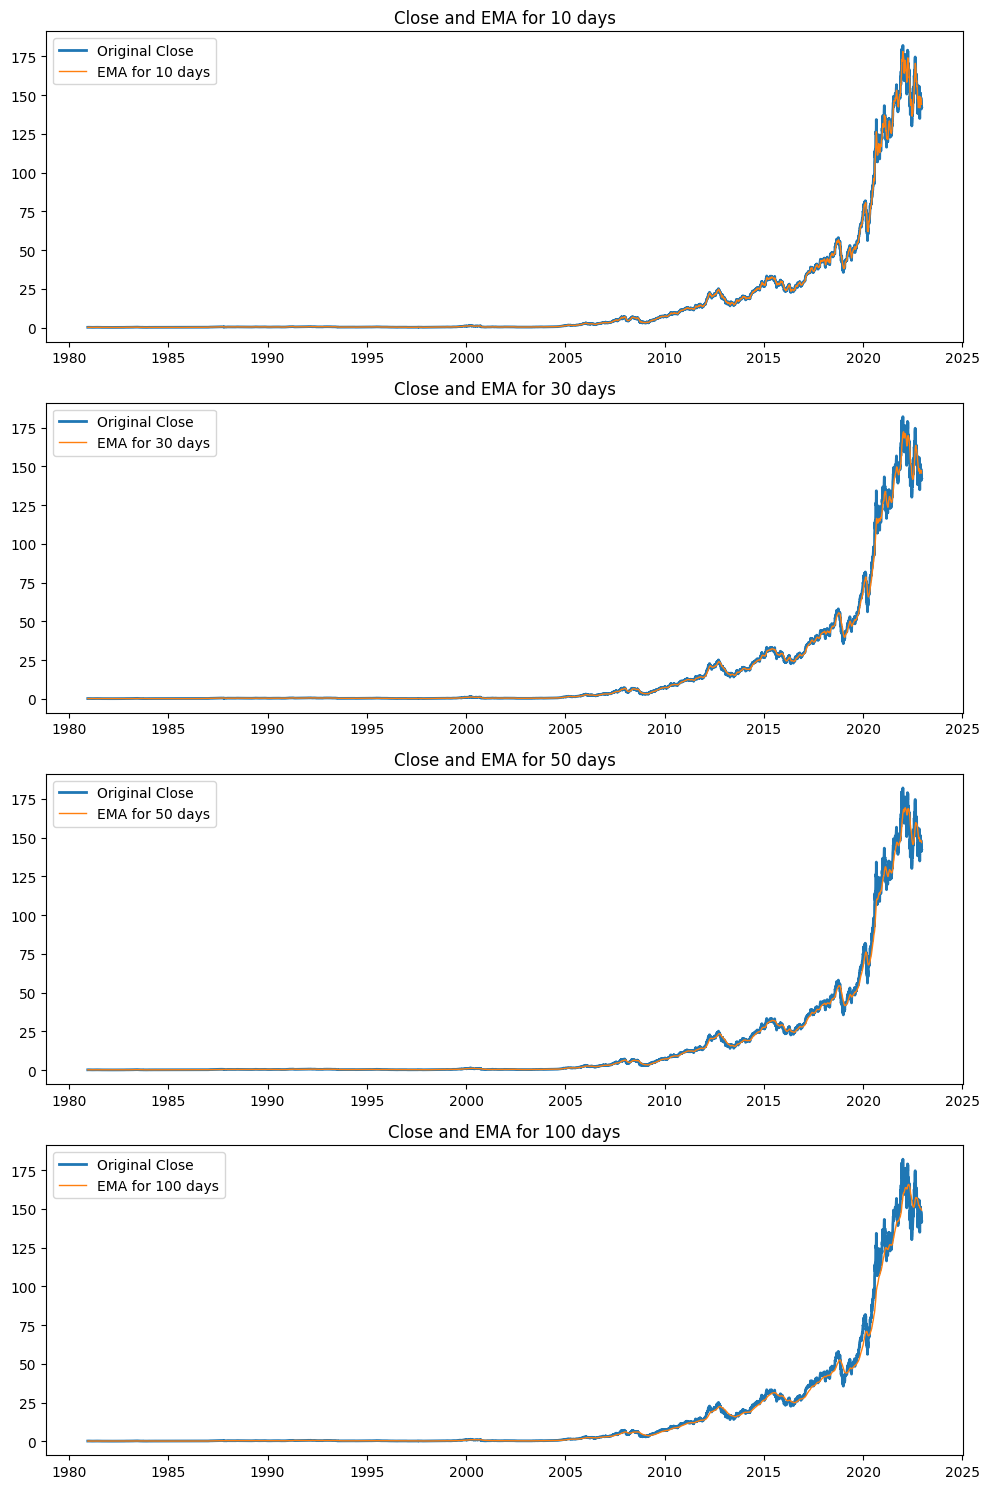

In [13]:
ma_day = [10, 30, 50, 100]
df_copy = df.copy()
for ma in ma_day:
    ema_column_name = f"EMA for {ma} days"
    df_copy[ema_column_name] = df_copy['Close'].ewm(span=ma, adjust=False).mean()

fig, axes = plt.subplots(nrows=len(ma_day), ncols=1, figsize=(10, 15))

for i, ma in enumerate(ma_day):
    ema_column_name = f"EMA for {ma} days"
    axes[i].plot(df_copy['Date'], df_copy['Close'], label='Original Close', linewidth=2)
    axes[i].plot(df_copy['Date'], df_copy[ema_column_name], label=f'{ema_column_name}', linewidth=1)
    axes[i].set_title(f'Close and {ema_column_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [14]:
train_size = int(len(df) * 0.9)
val_size = int(len(df) * 0.05)
train = df.iloc[:train_size, :]
val = df.iloc[train_size:train_size + val_size, :]
test = df.iloc[train_size + val_size:, :]

In [15]:
train = apply_moving_average_for_roc(dataframe=train, ma_type='ema', roc_window=10)
test = apply_moving_average_for_roc(dataframe=test, ma_type='ema', roc_window=10)
val = apply_moving_average_for_roc(dataframe=val, ma_type='ema', roc_window=10)

In [16]:
train.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close,ROC_0,ROC_1,ROC_2
9526,2018-09-21,54.322498,55.195000,384986800,55.340000,54.415001,52.337421,0,1,0
9527,2018-09-24,54.157501,54.205002,110773600,55.314999,55.197498,53.090046,0,1,0
9528,2018-09-25,54.924999,54.937500,98217600,55.705002,55.547501,53.426685,0,1,0
9529,2018-09-26,54.939999,55.250000,95938800,55.937500,55.105000,53.001076,0,1,0
9530,2018-09-27,55.884998,55.955002,120724800,56.610001,56.237499,54.090340,0,1,0
